In [84]:
# Rutas a las carpetas (ajusta según tu entorno)
AGUJAS_PATH = "agujas"
DADOS_PATH = "dados"

# Cargar imágenes
agujas_imgs, agujas_names = cargar_imagenes(AGUJAS_PATH, IMG_SIZE)
dados_imgs, dados_names = cargar_imagenes(DADOS_PATH, IMG_SIZE)

# Bordes Canny
agujas_bordes = [cv2.Canny(img.astype(np.uint8), 50, 150) for img in agujas_imgs]
dados_bordes = [cv2.Canny(img.astype(np.uint8), 50, 150) for img in dados_imgs]

# Kernel y clasificador
kernel_blur = np.ones((15, 15), np.float32) / 200

def clasificador_por_filtros(img_canny):
    img_densidad = cv2.filter2D(img_canny, -1, kernel_blur)
    valor_maximo = np.max(img_densidad)
    return "Dado" if valor_maximo > 100 else "Aguja"

# Predicciones
pred_agujas = [clasificador_por_filtros(b) for b in agujas_bordes]
pred_dados = [clasificador_por_filtros(b) for b in dados_bordes]

print(f"Predicciones Agujas: {pred_agujas.count('Aguja')}/{len(pred_agujas)}")
print(f"Predicciones Dados: {pred_dados.count('Dado')}/{len(pred_dados)}")

Predicciones Agujas: 8/10
Predicciones Dados: 7/10


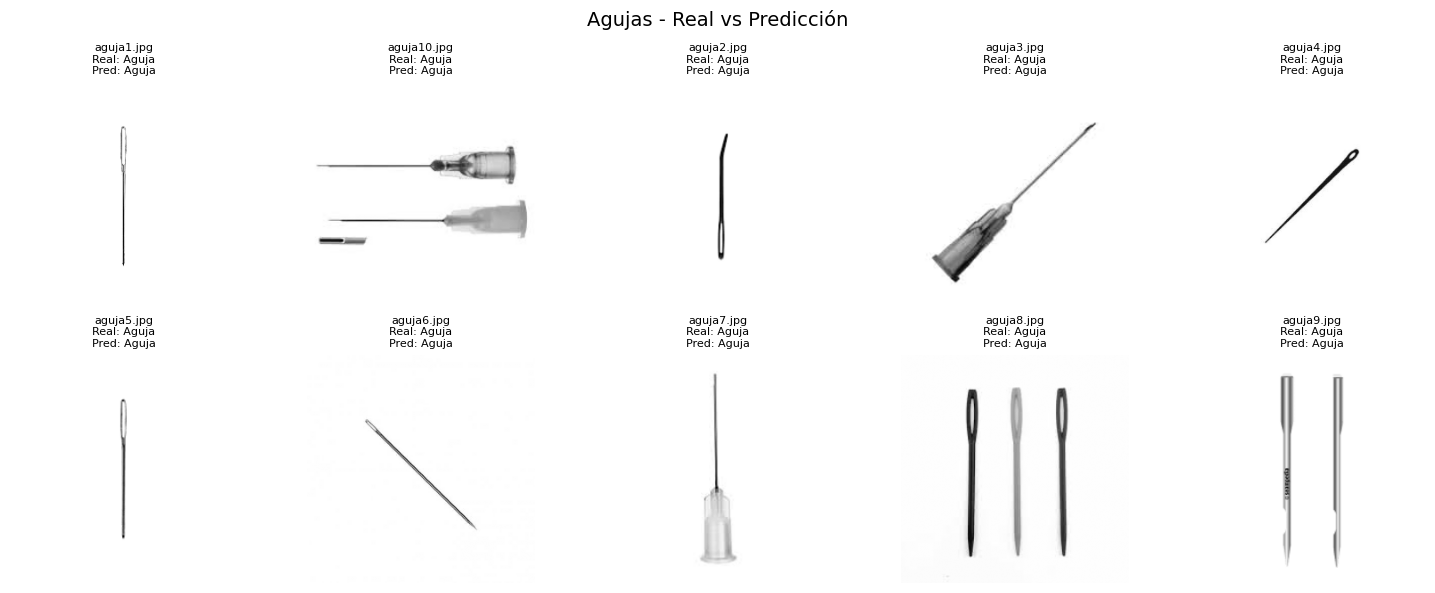

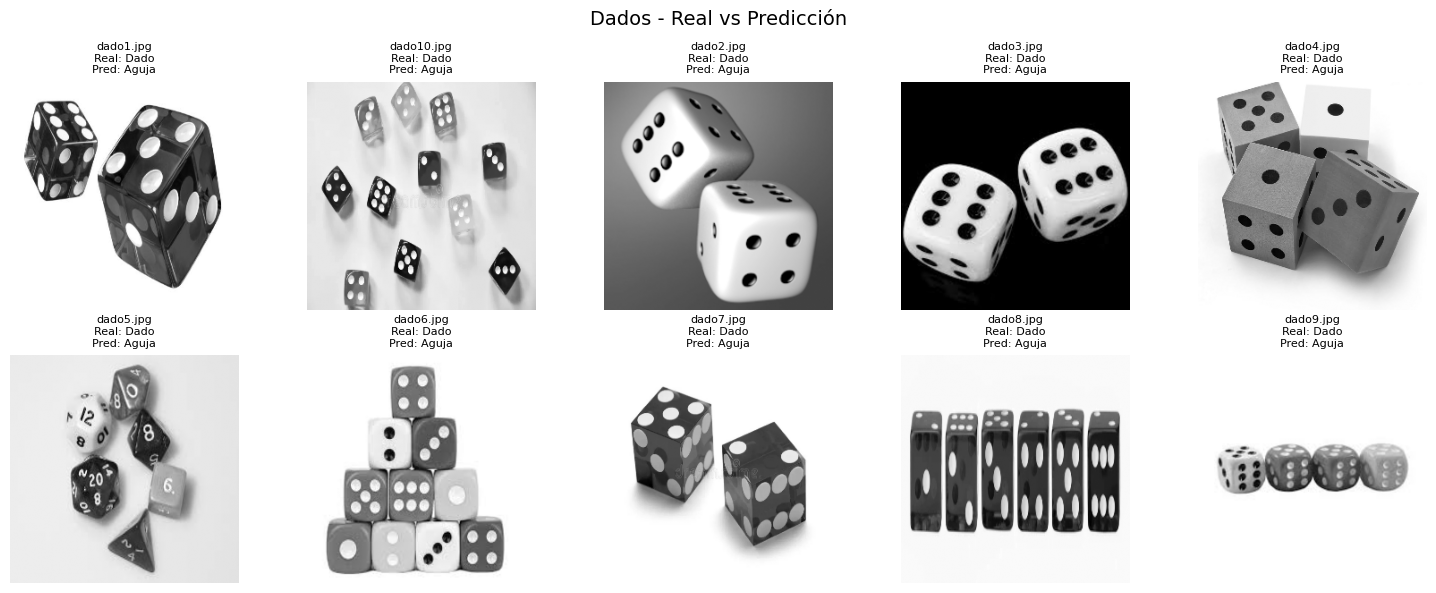

In [79]:


# Mostrar imágenes con etiqueta real y predicción
def mostrar_clasificacion(imgs, names, preds, etiqueta_real, titulo):
    n = len(imgs)
    cols = 5
    rows = int(np.ceil(n / cols))
    plt.figure(figsize=(cols * 3, rows * 3))
    plt.suptitle(titulo, fontsize=14)
    for i, (img, name, pred) in enumerate(zip(imgs, names, preds)):
        ax = plt.subplot(rows, cols, i + 1)
        ax.imshow(img, cmap="gray")
        ax.set_title(f"{name}\nReal: {etiqueta_real}\nPred: {pred}", fontsize=8)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

mostrar_clasificacion(agujas_imgs, agujas_names, pred_agujas, "Aguja", "Agujas - Real vs Predicción")
mostrar_clasificacion(dados_imgs, dados_names, pred_dados, "Dado", "Dados - Real vs Predicción")

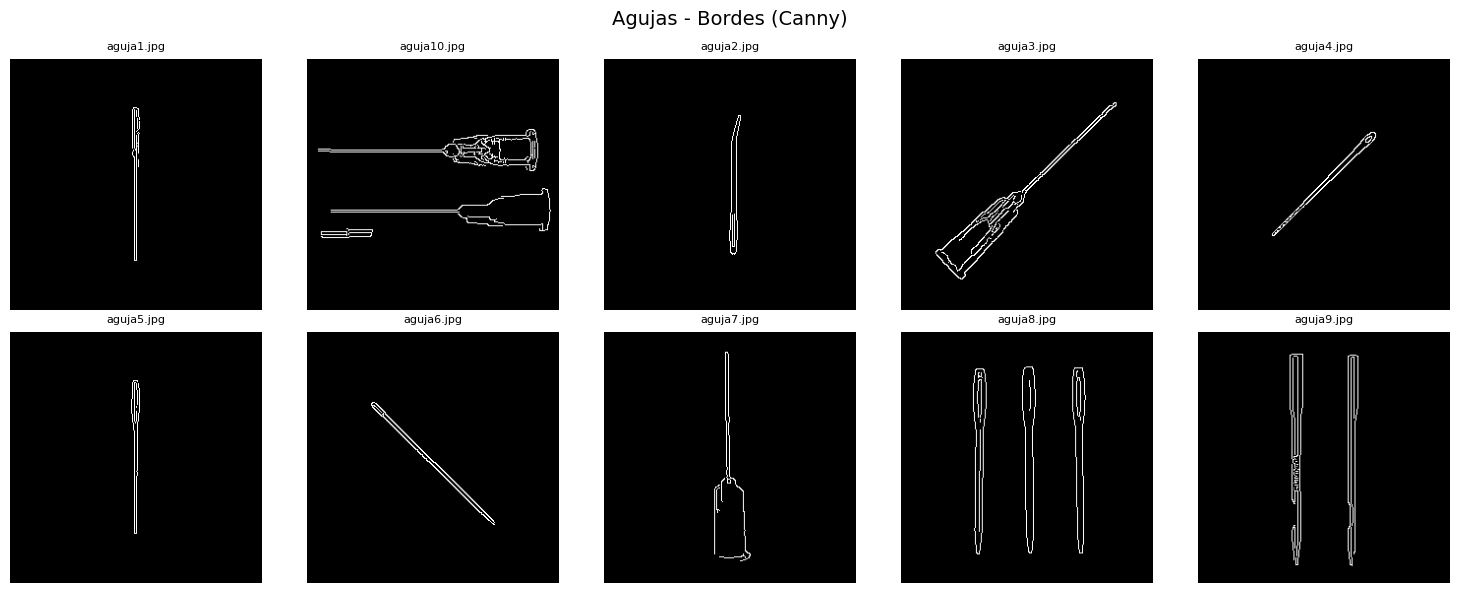

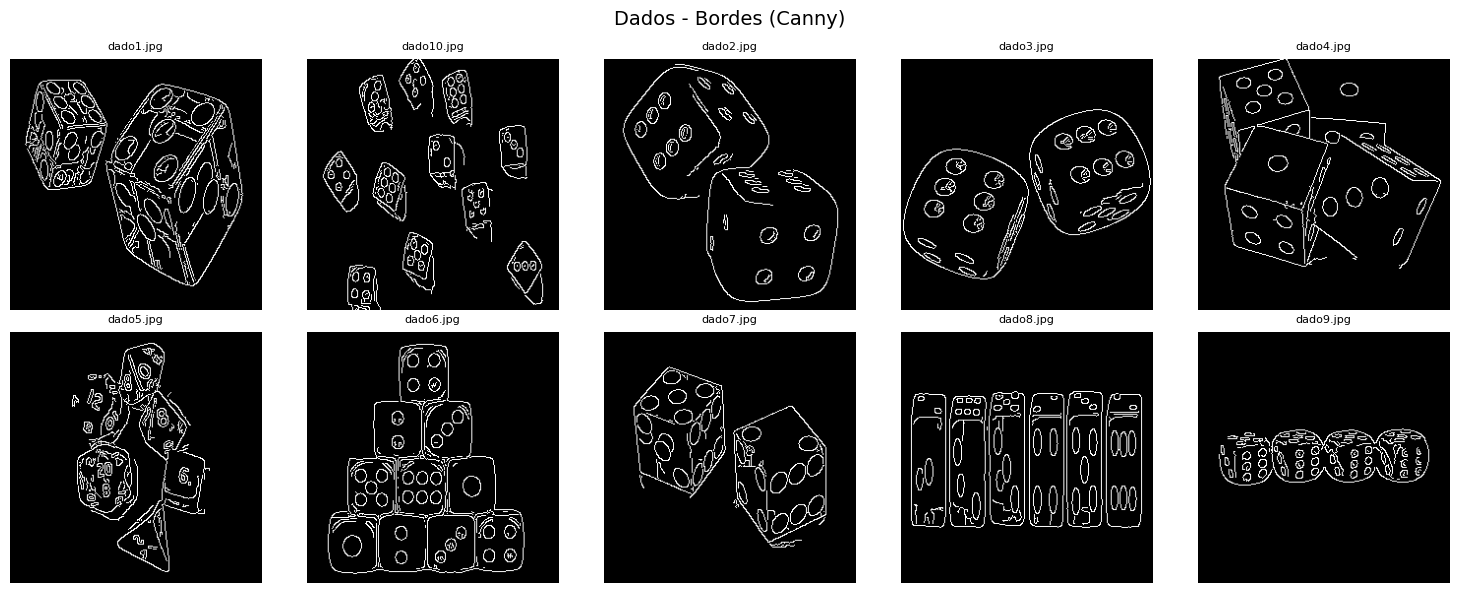

In [80]:
if agujas_imgs and agujas_bordes:
    mostrar_resultados(agujas_imgs, agujas_bordes, agujas_names, "Agujas - Bordes (Canny)")
else:
    print("No hay imágenes de agujas para mostrar.")

if dados_imgs and dados_bordes:
    mostrar_resultados(dados_imgs, dados_bordes, dados_names, "Dados - Bordes (Canny)")
else:
    print("No hay imágenes de dados para mostrar.")

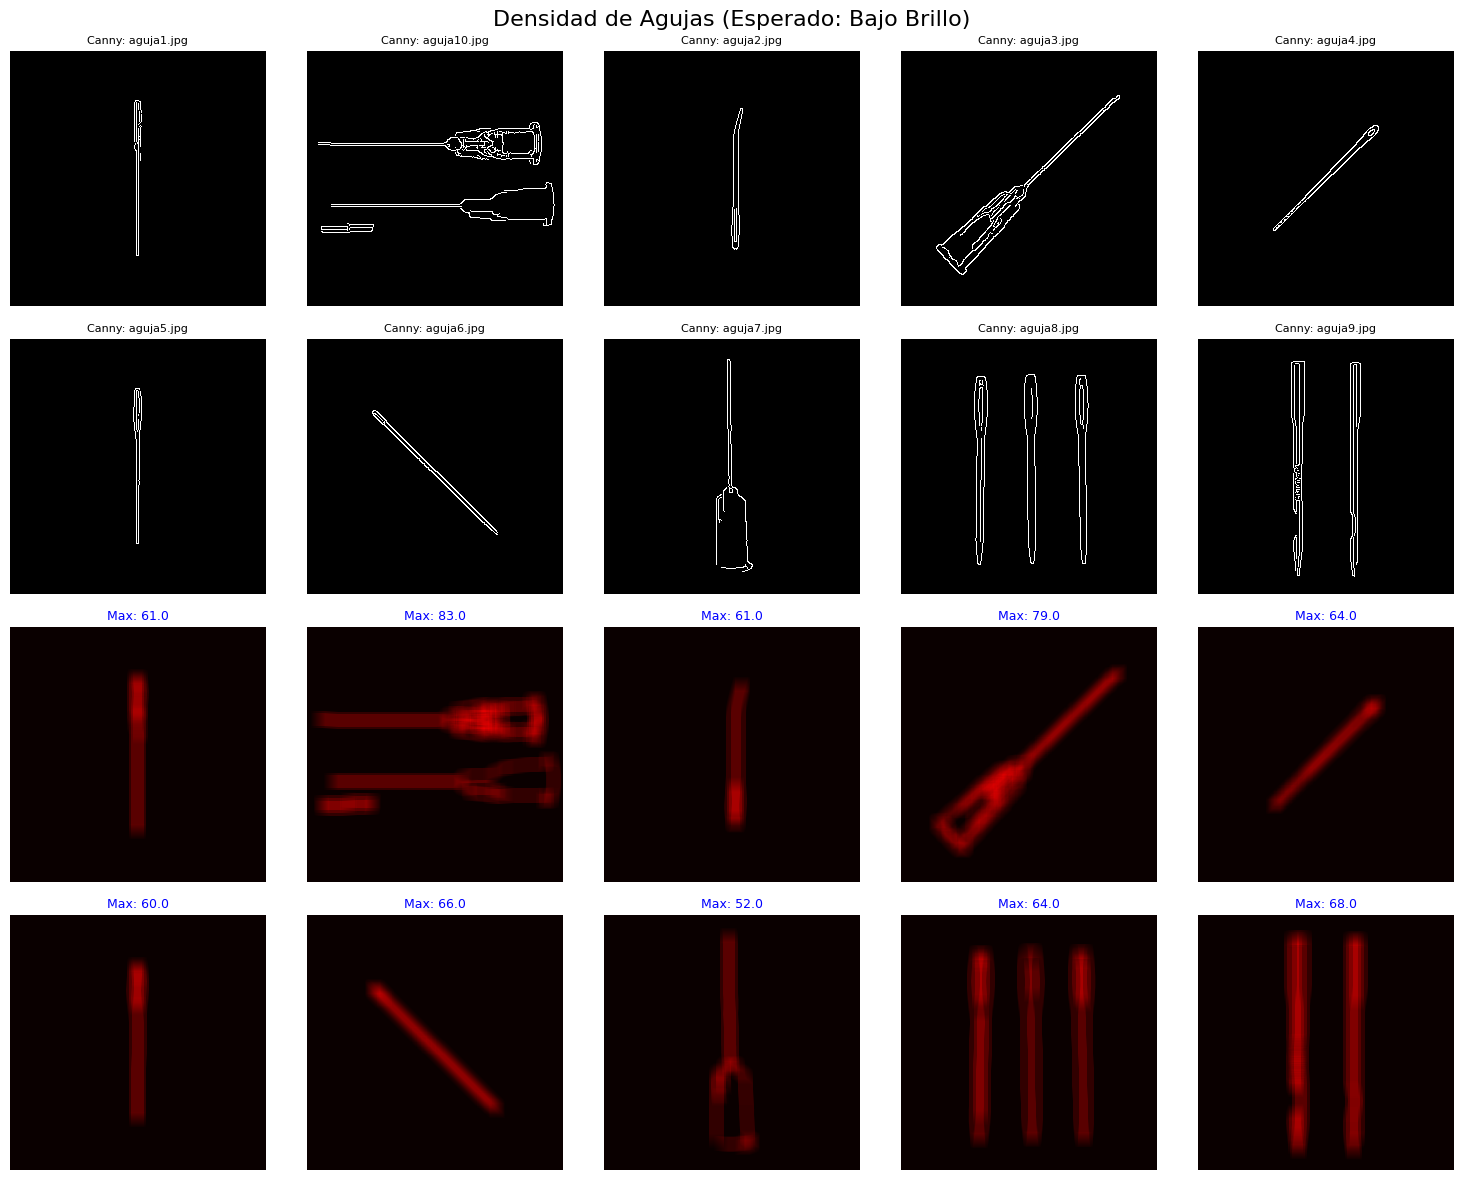

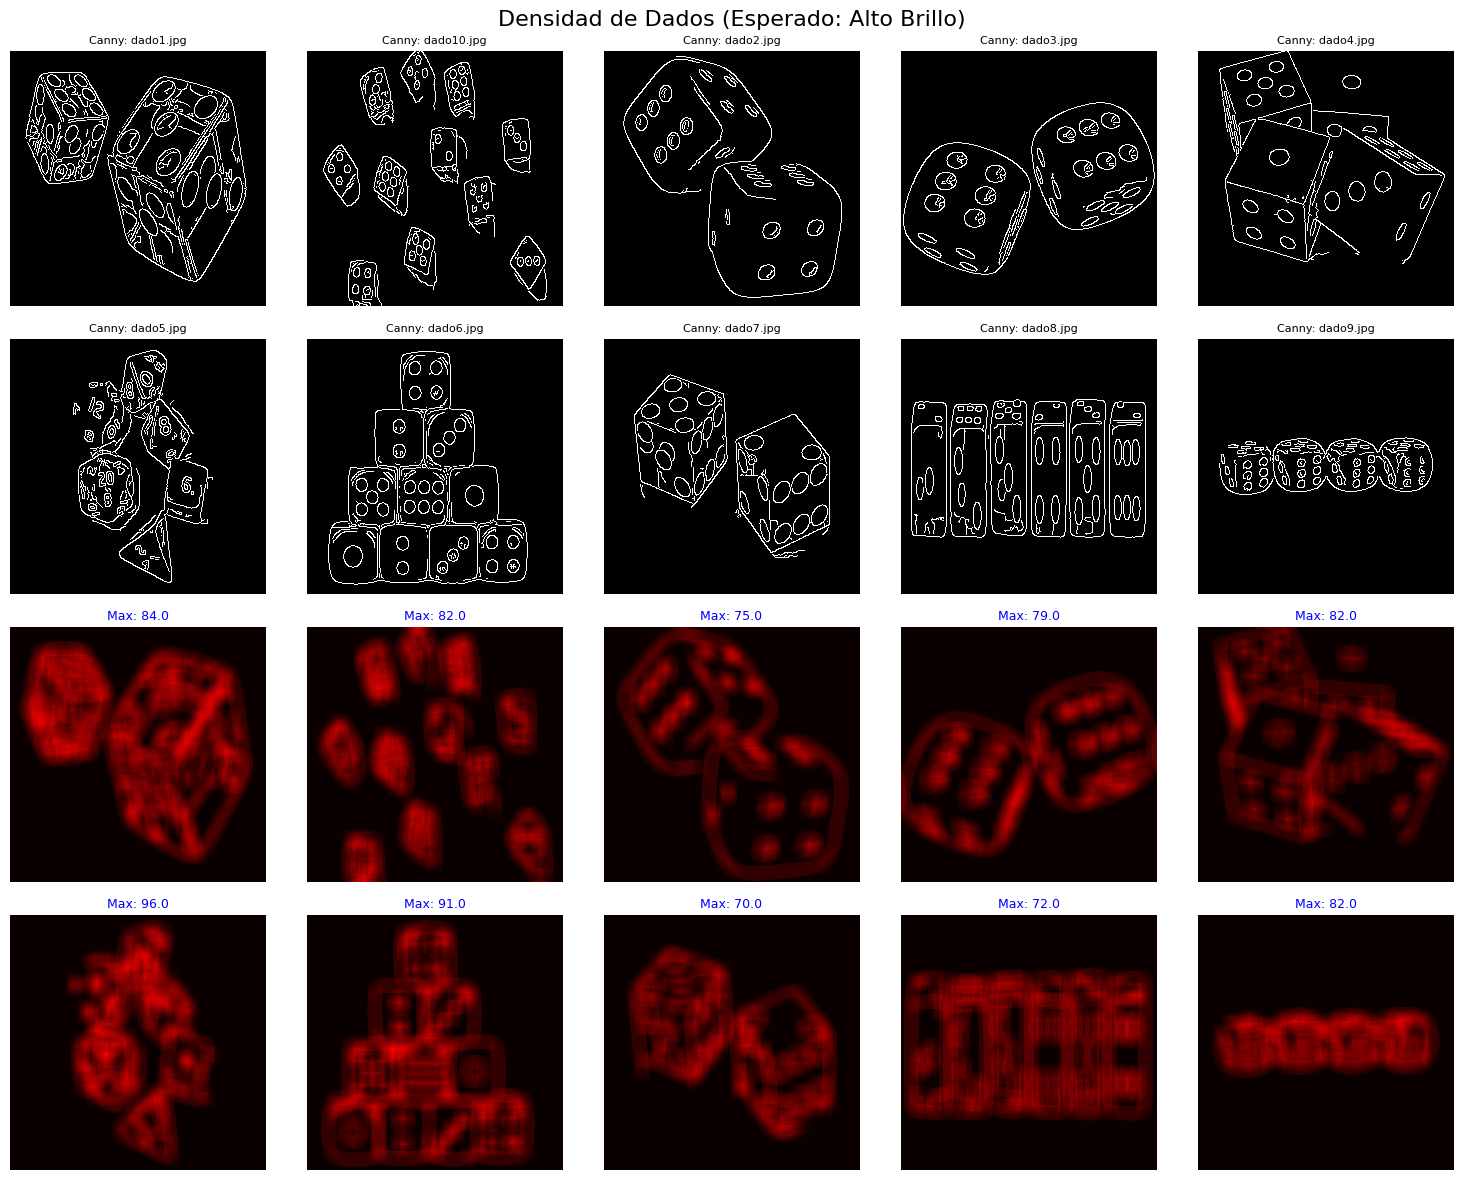

In [81]:
import matplotlib.pyplot as plt

def visualizar_densidad(imgs_canny, nombres, titulo):
    # Aplicar el filtro de densidad (el mismo de tu clasificador)
    # Usamos ddepth=cv2.CV_32F para no perder precisión decimal antes de visualizar
    img_densidades = [cv2.filter2D(img.astype(np.float32), -1, kernel_blur) for img in imgs_canny]

    n = len(imgs_canny)
    cols = 5
    rows = int(np.ceil(n / cols))

    plt.figure(figsize=(cols * 3, rows * 6))
    plt.suptitle(titulo, fontsize=16)

    for i in range(n):
        # Imagen Canny Original
        plt.subplot(rows * 2, cols, i + 1)
        plt.imshow(imgs_canny[i], cmap='gray')
        plt.title(f"Canny: {nombres[i]}", fontsize=8)
        plt.axis('off')

        # Imagen tras el Kernel de Densidad
        plt.subplot(rows * 2, cols, i + 1 + n)
        # Usamos vmin/vmax para que la escala de brillo sea comparable entre todas
        plt.imshow(img_densidades[i], cmap='hot', vmin=0, vmax=255)
        max_val = np.max(img_densidades[i])
        plt.title(f"Max: {max_val:.1f}", fontsize=9, color='red' if max_val > 100 else 'blue')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualizar ambos grupos
visualizar_densidad(agujas_bordes, agujas_names, "Densidad de Agujas (Esperado: Bajo Brillo)")
visualizar_densidad(dados_bordes, dados_names, "Densidad de Dados (Esperado: Alto Brillo)")

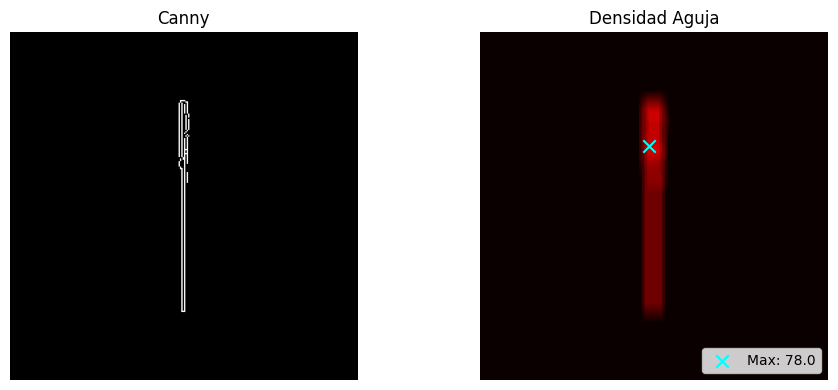

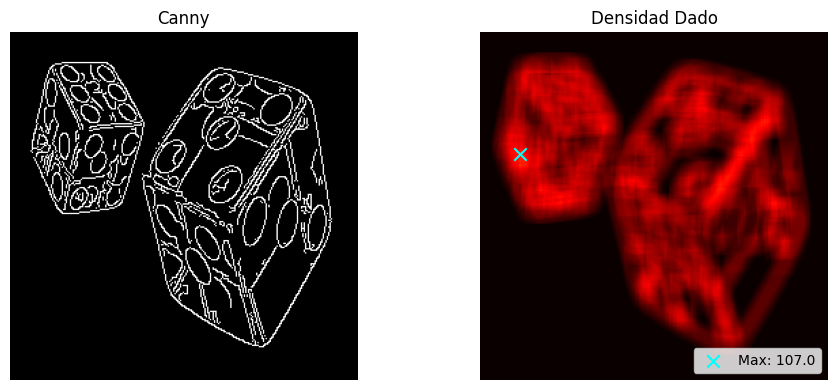

In [85]:
# Visualizar en qué sección se toma el valor máximo del filtro de densidad
def mostrar_max_densidad(img_canny, titulo=""):
    img_densidad = cv2.filter2D(img_canny, -1, kernel_blur)
    max_val = np.max(img_densidad)
    max_pos = np.unravel_index(np.argmax(img_densidad), img_densidad.shape)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img_canny, cmap="gray")
    plt.title("Canny")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img_densidad, cmap="hot", vmin=0, vmax=255)
    plt.scatter(max_pos[1], max_pos[0], c="cyan", s=80, marker="x", label=f"Max: {max_val:.1f}")
    plt.title(f"Densidad {titulo}")
    plt.axis("off")
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

# Ejemplo con una aguja y un dado
mostrar_max_densidad(agujas_bordes[0], "Aguja")
mostrar_max_densidad(dados_bordes[0], "Dado")

In [86]:
# Accuracy para agujas y dados
acc_agujas = pred_agujas.count("Aguja") / len(pred_agujas) if pred_agujas else 0
acc_dados = pred_dados.count("Dado") / len(pred_dados) if pred_dados else 0

# Accuracy global (combinado)
total_correctos = pred_agujas.count("Aguja") + pred_dados.count("Dado")
total_muestras = len(pred_agujas) + len(pred_dados)
acc_total = total_correctos / total_muestras if total_muestras else 0

print(f"Accuracy Agujas: {acc_agujas:.2%}")
print(f"Accuracy Dados: {acc_dados:.2%}")
print(f"Accuracy Total: {acc_total:.2%}")

Accuracy Agujas: 80.00%
Accuracy Dados: 70.00%
Accuracy Total: 75.00%


Final


## 📝 SECCIÓN 7: INFORME FINAL

Completa este informe explicando tu trabajo:

### Responde las siguientes preguntas:

**1. ¿Qué valores pusiste en tu Kernel 1 y por qué?**

```
mi Kernel 1 fue un kernel de promedio (blur) definido como np.ones((15, 15), np.float32) / 225.

Razón:
Utilicé este kernel para suavizar la imagen de bordes Canny. Al ser una matriz de unos, su función es acumular la intensidad de los píxeles blancos cercanos. Esto permite que las zonas con mucha concentración de bordes o esquinas (como los dados) mantengan un brillo alto, mientras que las líneas aisladas (como las agujas) se difuminen, permitiendo así una separación basada en la densidad de píxeles.
```

---

**2. ¿Qué valores pusiste en tu Kernel 2 y por qué?**

```
Para este experimento, no utilicé un segundo kernel de convolución distinto, sino que apliqué el mismo kernel de suavizado sobre las dos categorías para comparar sus respuestas máximas de intensidad.

Razón:
Puesto que teniamos un objeto "macizo" y un objeto delgado, considere que un solo kernel de promedio podía ser suficiente para resaltar las diferencias de densidad entre agujas y dados.
```

---

**3. ¿Cómo funciona tu clasificador?**

```
Primero, extraigo los bordes con Canny. Luego, aplico el kernel de suavizado con cv2.filter2D, lo que "dispersa" el brillo de los bordes. Finalmente, mido el valor de intensidad más alto (np.max) en la imagen resultante.

Así, si el valor máximo es superior a un umbral (ej. 100), significa que había muchos bordes juntos, por lo que se clasifica como Dado. Si el valor es inferior, los bordes estaban muy dispersos, clasificándose como Aguja.
```

---

**4. ¿Qué patrones detecta cada kernel?**

```
Kernel 1 detecta:
Kernel de promedio (15x15): Detecta densidad de bordes. No busca una orientación específica (como horizontal o vertical), sino que detecta qué tan "poblada" de píxeles blancos está una región pequeña de la imagen.

Kernel 2 detecta:
Filtro Canny:Detecta siluetas limpias combinando suavizado (Gauss), filtros de bordes (Sobel) y lógica de conexión (Histéresis).
```

---

**5. Si tu clasificador no fue 100% acertado, ¿qué cambiarías?**

```
El filtro se ve muy afectado por la cantidad de agujas en la imagen, es decir, se acercan mas a la "densidad" del dado o los dados, por las caracteristicas de las imagenes, la mayoria de imagenes de agujas tienen una o dos agujas, esto hace q su densidad sea menor que la de los dados. Para solucionar esto deberíamos aplicar otro tipo de filtros o metodos, que permitan detectar bordes alargados, o formas alargadas frente a formas cubicas o cuadradas.
```

---

**6. Conexión con CNNs: ¿Cómo se relaciona esto con redes neuronales convolucionales?**

```
Los kernels actúan como detectores de características que responden a patrones específicos. En una CNN, cada neurona aplica un kernel a la imagen para generar un "mapa de características" (como nuestra imagen de densidad). La gran diferencia es que aquí yo elegí manualmente un kernel de promedio y un umbral de 100, mientras que una CNN, a través del entrenamiento, aprende automáticamente qué valores de matriz y qué umbrales son los mejores para distinguir entre un dado y una aguja.
```

---